In [1]:
import gdal
import numpy as np
import os
import matplotlib.pyplot as plt
import rasterio

#import data_loader 

path_bdd = "/work/OT/ai4geo/DATA/DATA_MULTIMODAL/"
path_bdd_France = "/work/OT/ai4geo/DATA/DATA_MULTIMODAL/France/"
path_bdd_USA = "/work/OT/ai4geo/DATA/DATA_MULTIMODAL/USA/"
#path_Zone1 = "/work/OT/ai4geo/DATA/DATA_MULTIMODAL/France/Zone1"


def get_file_in_folder(folder):
    """
        Liste récursivement le contenu des sous-répertoires
    """
    list_file = []
    for f in os.listdir(folder):
        if os.path.isdir(folder+'/'+f): # si f est un dossier
            list_file.append(get_file_in_folder(folder+'/'+f))
        else :
            list_file.append(folder+'/'+f) 
    
    return(list_file)

list_file = get_file_in_folder(path_bdd)
flattened_list = [z for x in list_file for y in x for z in y]
print(len(flattened_list))

10842


In [2]:
def select_file_name(list_file, word):
    list_selected = []
    for file in list_file:
        if str(file).find(word) != -1:
            list_selected.append(file)
    return list_selected

list_raster_file = select_file_name(list_file[0][10], 'OSM')
print(len(list_raster_file))
list_optique_file = select_file_name(list_file[0][10], 'S2')
print(len(list_optique_file))
list_SAR_file = select_file_name(list_file[0][10], 'S1moy')
print(len(list_SAR_file))

18
18
18


In [11]:
SAR_band = SAR.GetRasterBand(1)
SAR_array = SAR_band.ReadAsArray()
# Optique_band = Optique.GetRasterBand(1)
Optique_array = Optique.read()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/work/OT/ai4geo/DATA/DATA_MULTIMODAL//France/Zone0/Couple0_S1moy_2015-09-29__dual_02_04.tif
/work/OT/ai4geo/DATA/DATA_MULTIMODAL//France/Zone0/Couple0_S2_2015-09-30_2015-09-29_02_04.tif
[[[0.51123047 0.34277344 0.16503906]
  [0.52099609 0.34472656 0.16113281]
  [0.51123047 0.33886719 0.16455078]
  ...
  [0.53759766 0.37304688 0.17919922]
  [0.52929688 0.36572266 0.16748047]
  [0.52441406 0.36621094 0.16650391]]

 [[0.51513672 0.35009766 0.16894531]
  [0.52001953 0.34375    0.16503906]
  [0.51513672 0.34375    0.16015625]
  ...
  [0.53613281 0.36474609 0.16699219]
  [0.53662109 0.36083984 0.171875  ]
  [0.53027344 0.36865234 0.16845703]]

 [[0.52636719 0.34521484 0.16552734]
  [0.51611328 0.34179688 0.16650391]
  [0.51904297 0.34863281 0.16357422]
  ...
  [0.52929688 0.36132812 0.17578125]
  [0.53759766 0.36523438 0.16796875]
  [0.53564453 0.37207031 0.17138672]]

 ...

 [[0.53466797 0.44384766 0.34960938]
  [0.50048828 0.41845703 0.31201172]
  [0.54003906 0.44189453 0.36621094]
  ...
 

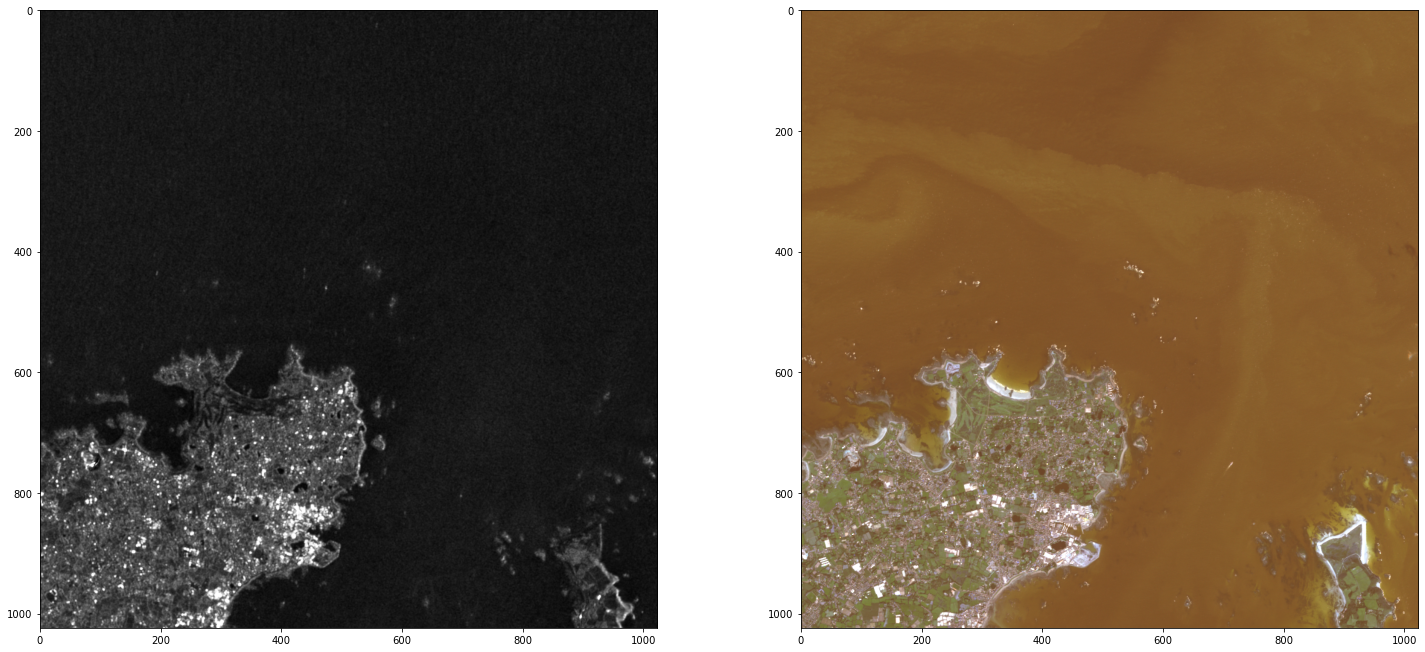

In [19]:
list_SAR_file = sorted(list_SAR_file)
list_optique_file = sorted(list_optique_file)

print(list_SAR_file[3])
print(list_optique_file[3])

from skimage import io

SAR = gdal.Open(list_SAR_file[3])
Optique = rasterio.open(list_optique_file[3])

img = io.imread(list_optique_file[3]) / 2048
GT = io.imread(list_SAR_file[3])

figure = plt.figure(figsize = (25,25))
figure.add_subplot(2,2,1)
plt.imshow(SAR_array, cmap = "gray")
figure.add_subplot(2,2,2)
plt.imshow(np.array(img, dtype=float))
print(img)


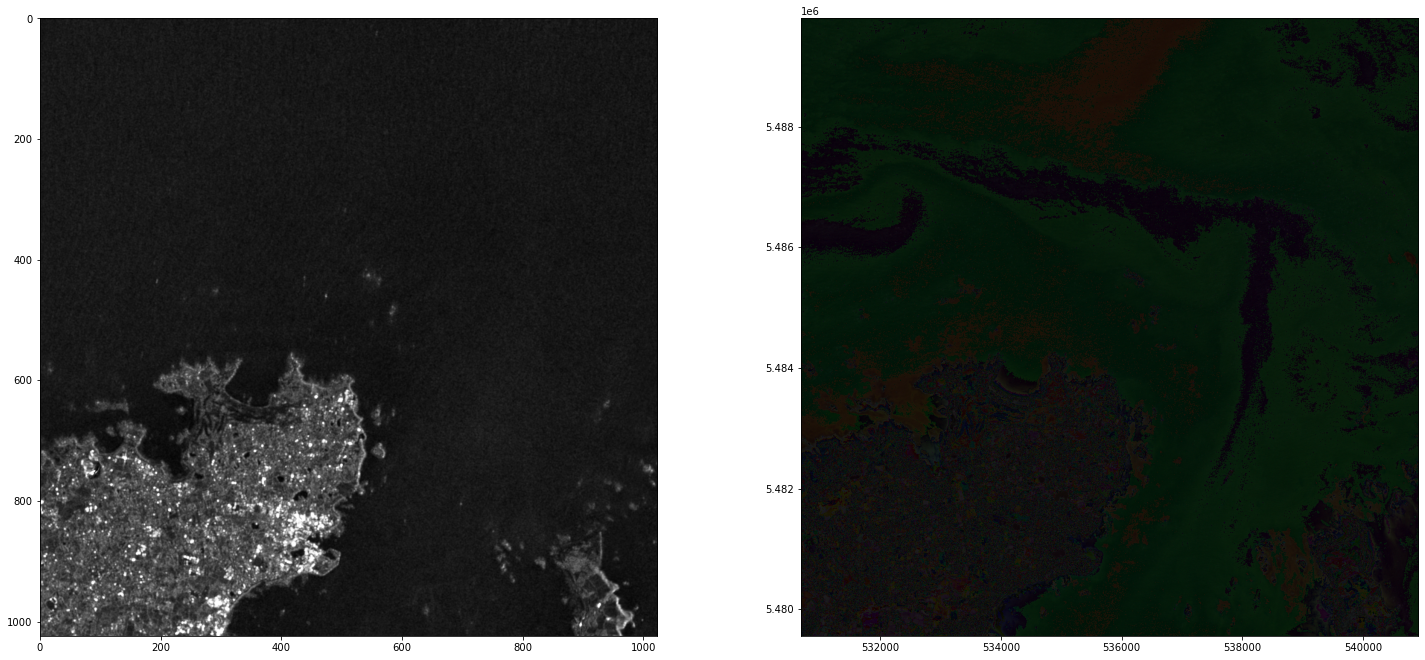

<AxesSubplot:>

In [6]:
from rasterio.plot import show
figure = plt.figure(figsize = (25, 25))
figure.add_subplot(2, 2, 1)
plt.imshow(SAR_array, cmap = "gray")
figure.add_subplot(2, 2, 2)
out = Optique_array*255/2000
out = out.astype(int)
show(out, transform=Optique.transform)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

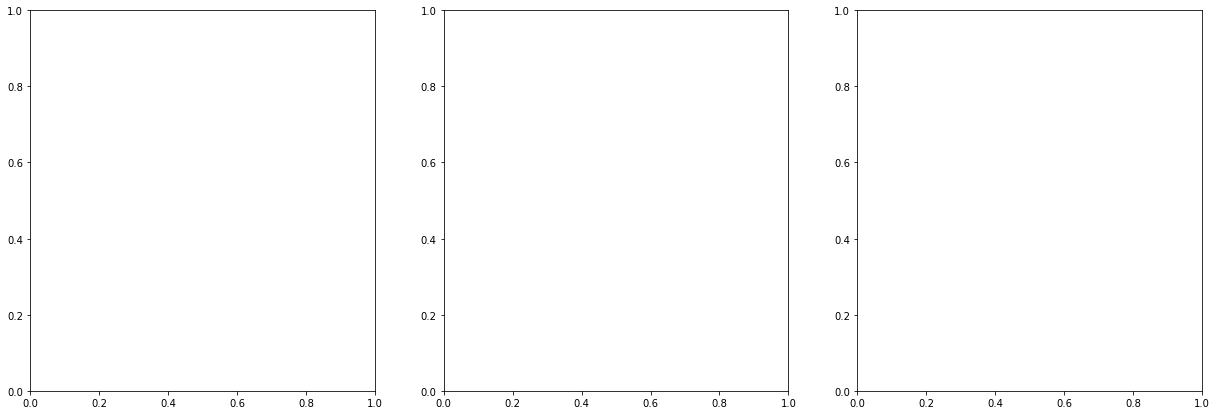